In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import sys
import os
import glob
import importlib
import multiprocessing as mp
import itertools
import math
import random 

from matplotlib import pyplot as plt
import matplotlib.animation as animation
import scipy.sparse as sparse
import scipy.io as sio
import scipy.stats as stats
import scipy.spatial.distance as dist
import numpy as np
import h5py
from tqdm import tqdm
import pandas as pd
import tables
import deepdish as dd

sys.path.append('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis')
import python_utils_jjm as jjm_utils

In [3]:
results_file = '/Volumes/My_Passport/cnmfe_analysis_files/GRIN011/memmap_0000memmap_0004_resized_source_extraction_13:05:33.239/frames_1_5000/LOGS_15-Oct_13_10_52/15-Oct_13_23_16.mat_out.mat'
results = sio.loadmat(results_file)

##A is spatial contours

In [4]:
#spatial footprints as 1d array
results['A']

<360960x120 sparse matrix of type '<class 'numpy.float64'>'
	with 159871 stored elements in Compressed Sparse Column format>

In [5]:
#img_file = '/Users/johnmarshall/Documents/Analysis/MiniscopeMovies/GRIN011/H10_M19_S59msCam1.tif'
#img_from_file = plt.imread(img_file)    
#d1, d2 = np.shape(img_from_file)
d1, d2 = 480, 752

In [6]:
results['A'][:, 1]

<360960x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1089 stored elements in Compressed Sparse Column format>

In [ ]:
480*752

In [22]:
np.shape(results['A'])

(360960, 120)

In [23]:
# reshape spatial coordinates
A_reshaped = [np.reshape(dense_A[:, cell], (480, 752)) for cell in range(np.shape(results['A'])[1])]

In [ ]:
# reshape spatial coordinates
C_recombined = [np.array([np.dot(A_reshaped[cell], ) for frame in range(len(Ctraces_1))])]

In [7]:
#reshape as 2d with original image dimensions
dense_A = results['A'].todense()
A_reshaped_1 = np.reshape(dense_A[:, 1], (480, 752))
A_reshaped_2 = np.reshape(dense_A[:, 2], (480, 752))

In [24]:
np.shape(A_reshaped)

(120, 480, 752)

In [8]:
# if selecting frame subset  
Ctraces_1 = results['C'][1, :500]
Ctraces_2 = results['C'][2, :500]

In [10]:
movie_ = np.array([np.dot(A_reshaped_1, Ctraces_1[frame]) for frame in range(len(Ctraces_1))])
movie_2 = np.array([np.dot(A_reshaped_2, Ctraces_2[frame]) for frame in range(len(Ctraces_2))])

In [11]:
movie = movie_+movie_2 

In [12]:
np.shape(movie)

(500, 480, 752)

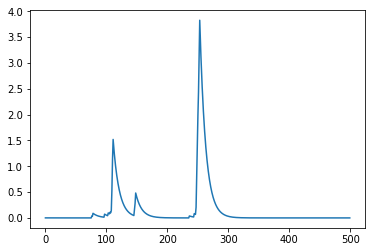

In [13]:
plt.plot(Ctraces_1)

In [15]:
print('            '+str(np.argmax(Ctraces_1)))
print('            '+str(np.argmin(Ctraces_1)))

            253
            499


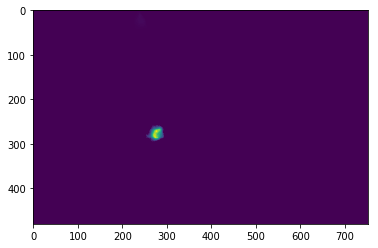

In [17]:
#lowest intensity frame
plt.imshow(movie[253])

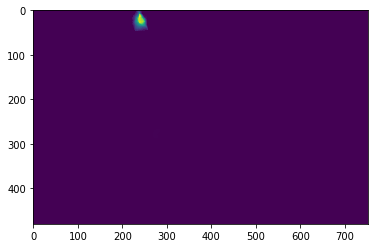

In [18]:
#highest intensity frame
plt.imshow(movie[343])

In [19]:
import imageio


In [20]:
imageio.mimwrite('/Volumes/My_Passport/cnmfe_analysis_files/GRIN011/test_out_combined.mp4', movie, fps = 20)